**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 21. Techniques for Choosing Variables

*Edit and run the cell below to resize the plots.*

In [1]:
options(repr.plot.width=8, repr.plot.height=8)

## Overview

- A __term__ is a predictor, function of a predictor (like quadratic terms), or quantity derived from more than one predictor 

- Suppose we have many potential terms that we can include in our model

- If we have $k$ possible terms, then how many possible models are there? 

*Write your notes here. Double-click to edit.*

*Solution.* There are $2^k$ possible models: each term can either be in the model or not.

- In this lesson, we will learn about techniques for choosing a "good" set of predictors

## Example 1

The dataset `FirstYearGPA` from the `Stat2Data` library contains measurements on 219 college students.
The response variable is $\mathit{GPA}$ (grade point average after one year of college).
The potential predictors are:

| Variable | Description | 
| :- | :- |
| _HSGPA_ | High school GPA |
| _SATV_ | Verbal/critical reading SAT score |
| _SATM_ | Math SAT score |
| _Male_ | 1 for male, 0 for female |
| _HU_ | Number of credit hours earned in humanities courses in high school |
| _SS_ | Number of credit hours earned in social science courses in high school |
| _FirstGen_ | 1 if the student is first in their family to attend college |
| _White_ | 1 for white students, 0 for others |
| _CollegeBound_ | 1 if attended a high school where $\ge$ 50% of students intdent to go on to college |

In [2]:
library(Stat2Data)
data(FirstYearGPA)
head(FirstYearGPA)

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,3.06,3.83,680,770,1,3.0,9.0,1,1,1
2,4.15,4.00,740,720,0,9.0,3.0,0,1,1
3,3.41,3.70,640,570,0,16.0,13.0,0,0,1
4,3.21,3.51,740,700,0,22.0,0.0,0,1,1
5,3.48,3.83,610,610,0,30.5,1.5,0,1,1
6,2.95,3.25,600,570,0,18.0,3.0,0,1,1


- Let's start by creating scatterplots between all the _quantitative_ variables in `FirstYearGPA`

- This way, we can visually see the correlations between our response variable $\mathit{GPA}$ and the other quantitative variables

- We can create a dataframe using certain existing columns from another dataframe like this:

    ```r
    FirstYearGPA[, c('GPA', 'HSGPA', 'SATV', 'SATM', 'HU', 'SS')]
    ```
   <br>
    
    - We've used a similar construct before to select certain rows of a dataframe
    - Note the placement of the comma!<br><br>
    
- Then, we can use `pairs()` function to get scatterplots between all the variables in the dataframe, like this:

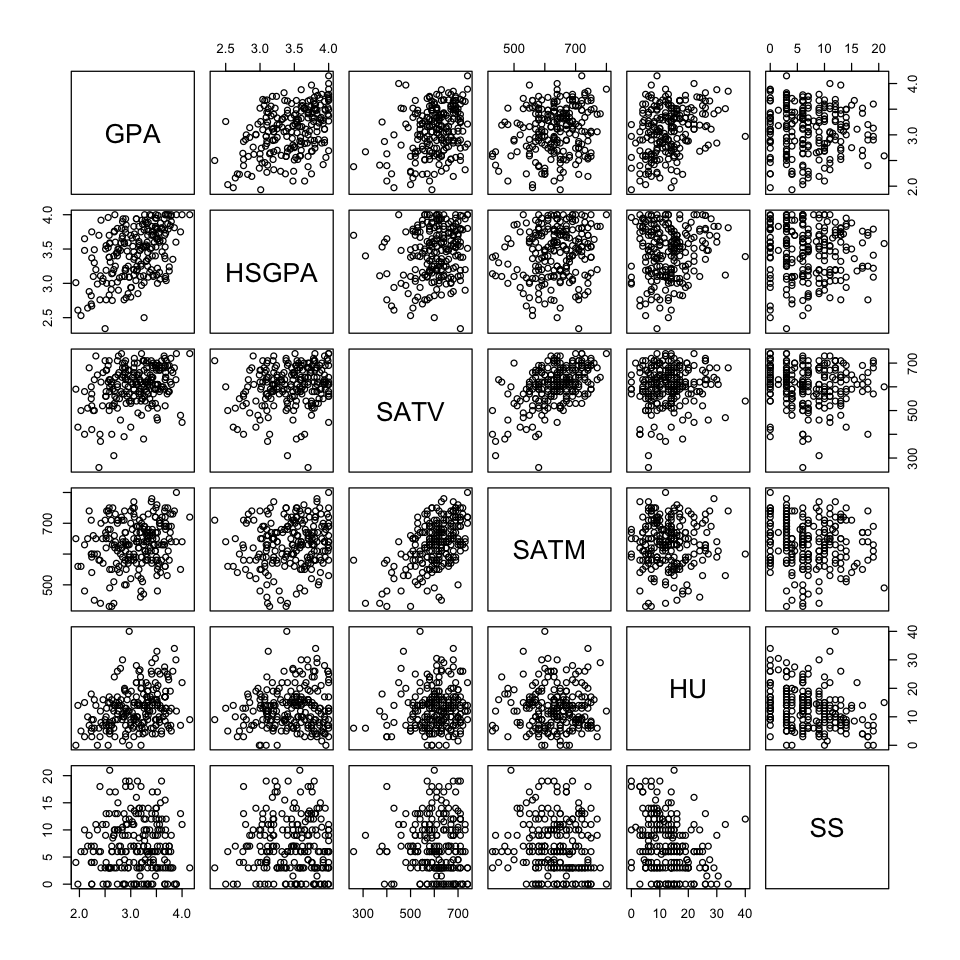

In [3]:
# Solution
pairs(FirstYearGPA[, c('GPA', 'HSGPA', 'SATV', 'SATM', 'HU', 'SS')])

- We can also create boxplots of our response variable $\mathit{GPA}$ _by group_ for the four categorical predictors, like this:

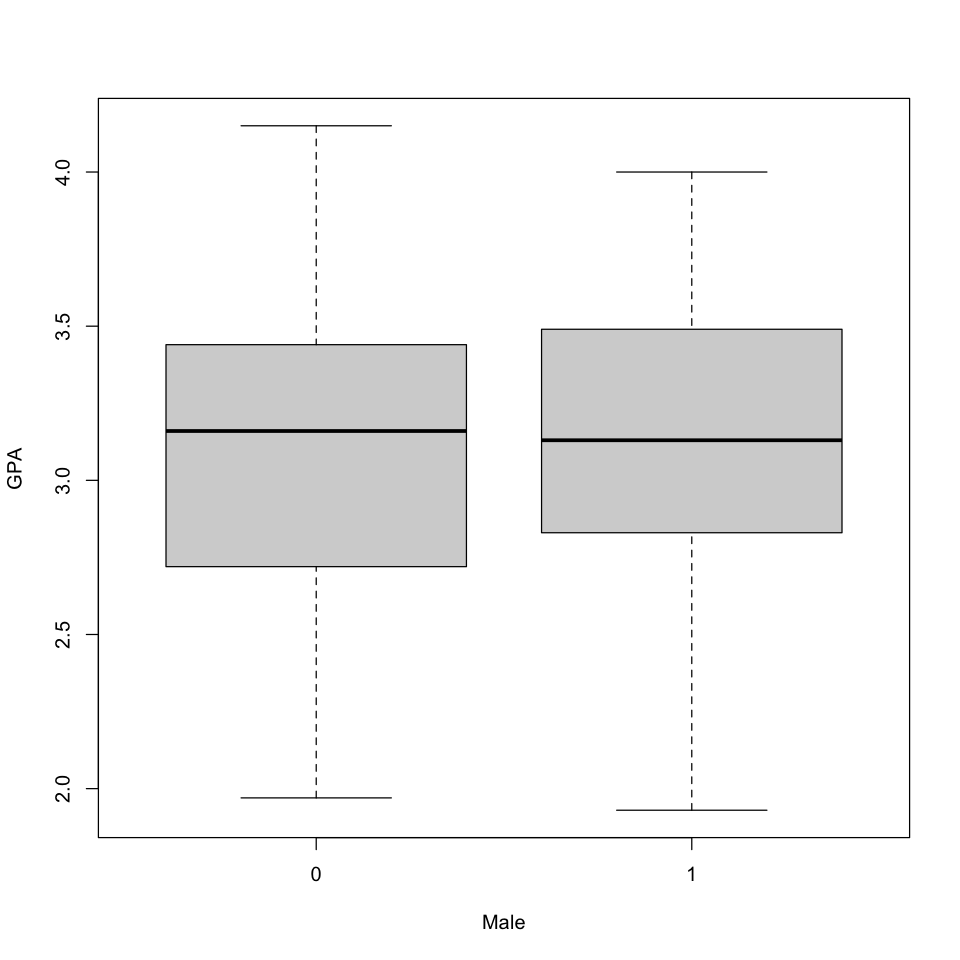

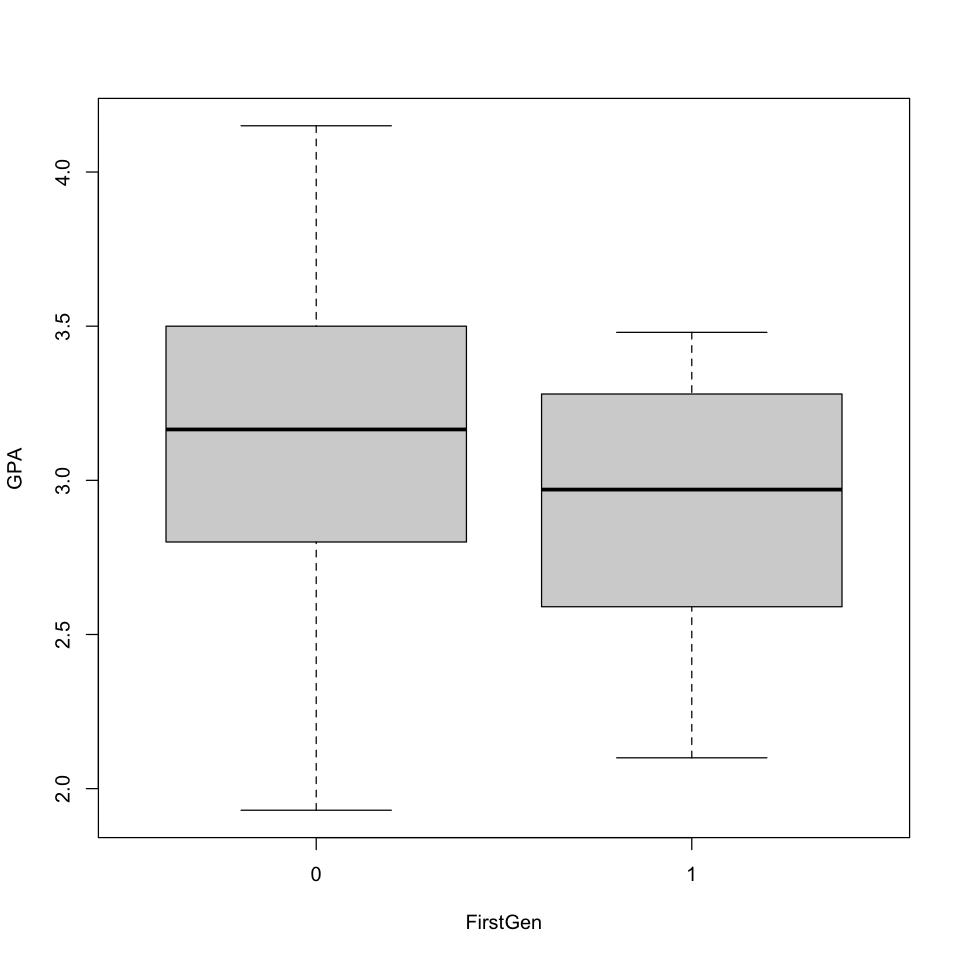

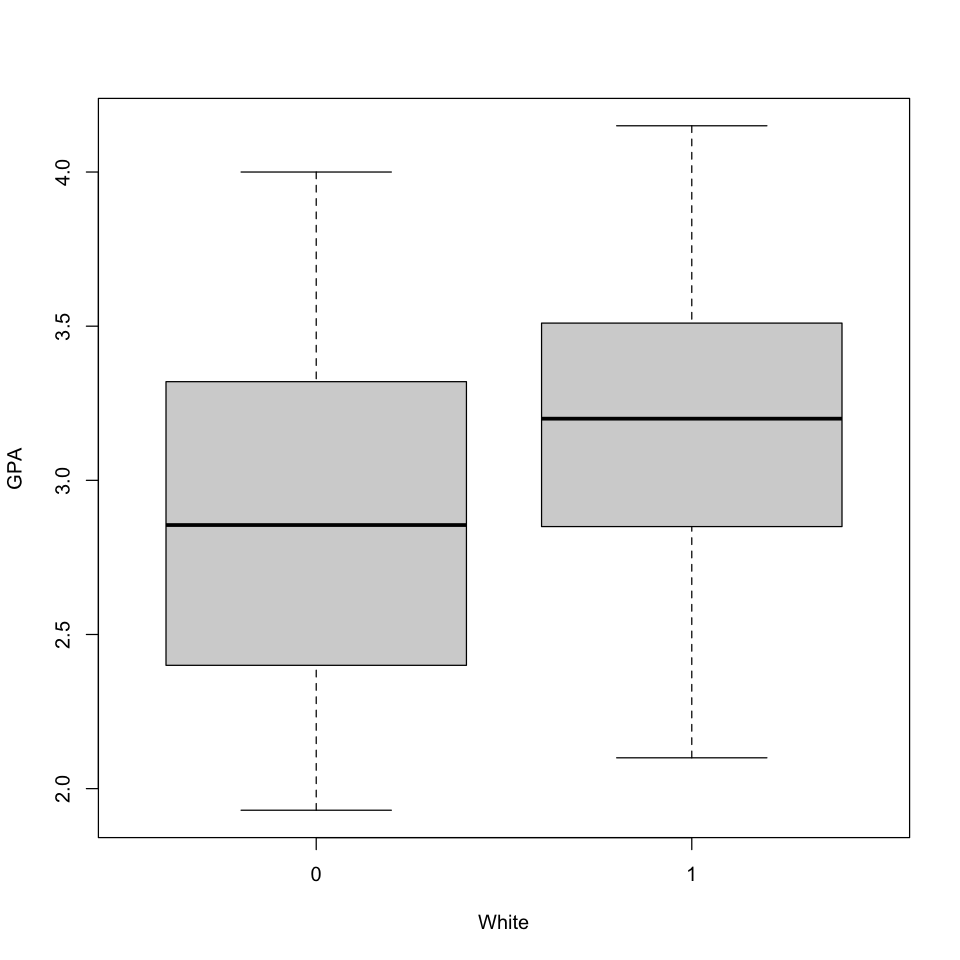

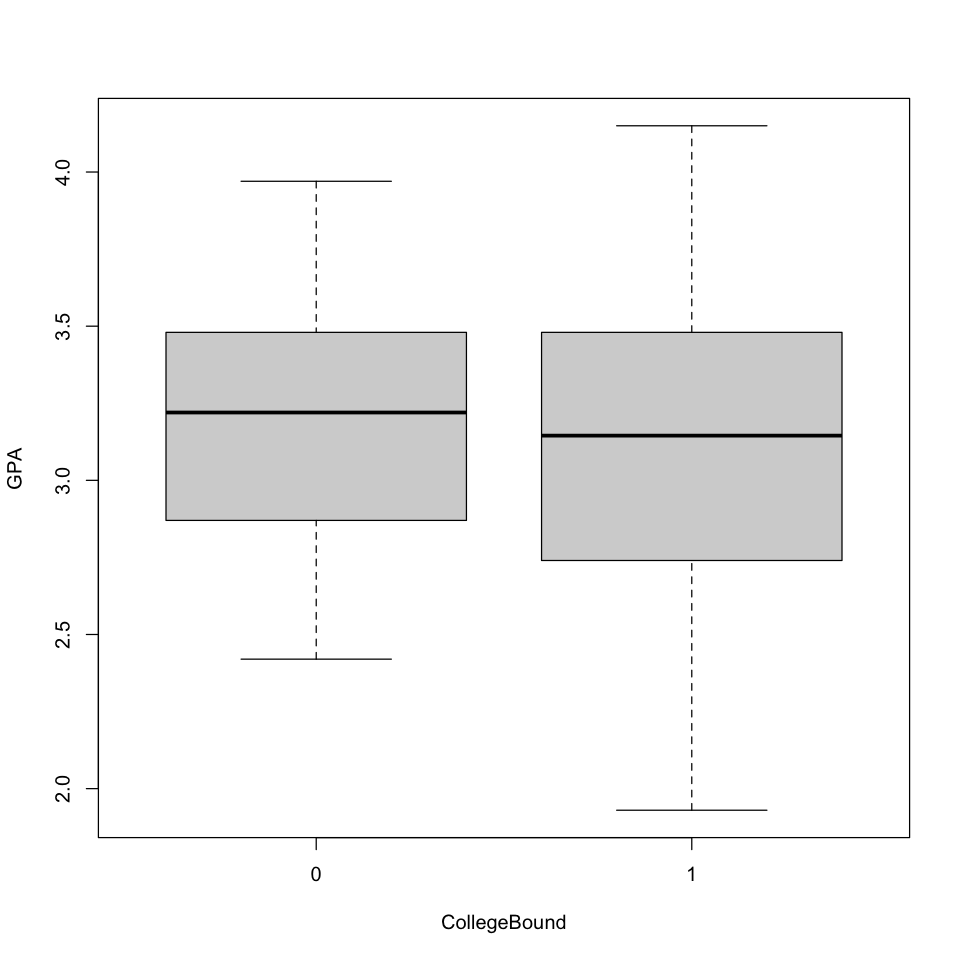

In [4]:
# Solution
boxplot(GPA ~ Male, data = FirstYearGPA)
boxplot(GPA ~ FirstGen, data = FirstYearGPA)
boxplot(GPA ~ White, data = FirstYearGPA)
boxplot(GPA ~ CollegeBound, data = FirstYearGPA)

- We can also get the correlation between $\mathit{GPA}$ and all the other possible predictors, like this:

In [5]:
# Solution
cor(FirstYearGPA)["GPA",]

GPA        HSGPA         SATV         SATM         Male           HU 
  1.00000000   0.44688735   0.30431137   0.19434385   0.05284917   0.31465575 
          SS     FirstGen        White CollegeBound 
 -0.00356909  -0.15657732   0.28177214  -0.06302497

* Based on the plots and computations above, which predictors do you think are promising?

*Write your notes here. Double-click to edit.*

## Best subsets regression

- __Best subsets regression__ chooses predictors by comparing _all possible subsets of predictors_ according to some metric 

    - For example, adjusted $R^2$

- Given the power and speed of today's computers, this is feasible, as long as the number of predictors is not too large

- In R, we can use the `regsubsets()` function from the `leaps` library 

    - _Note._ You may need to install the `leaps` library first:

        ```r
            install.packages('leaps')
        ```

## Example 2

Continuing the `FirstYearGPA` example in Example 1 above...

* We can run the best subsets regression procedure like this:

In [6]:
library(leaps)

In [7]:
models <- regsubsets(GPA ~ HSGPA + SATV + SATM + Male + HU + SS + FirstGen + White + CollegeBound, 
                     data = FirstYearGPA, nbest = 2)
sum <- summary(models)
cbind(as.data.frame(sum$outmat), sum$rsq, sum$adjr2, sum$cp)

,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound,sum$rsq,sum$adjr2,sum$cp
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1 ( 1 ),*,,,,,,,,,0.19970830,0.19602032,42.180513
1 ( 2 ),,,,,*,,,,,0.09900824,0.09485621,74.541330
2 ( 1 ),*,,,,*,,,,,0.26971619,0.26295431,21.682884
2 ( 2 ),*,,,,,,,*,,0.26807581,0.26129873,22.210037
3 ( 1 ),*,,,,*,,,*,,0.32308931,0.31364405,6.530981
3 ( 2 ),*,*,,,*,,,,,0.30791668,0.29825970,11.406836
4 ( 1 ),*,*,,,*,,,*,,0.33749853,0.32511533,3.900456
4 ( 2 ),*,,,,*,,*,*,,0.32964080,0.31711072,6.425605
5 ( 1 ),*,*,,,*,*,,*,,0.34374727,0.32834227,3.892373


- The `nbest = 2` keyword argument in `regsubsets()` tells R to output the information for the 2 models with the highest $R^2$ at each size

- The second to last column of the `regsubsets()` output table shows the adjusted $R^2$ for each model

- Suppose that our goal is to find a model that maximizes the adjusted $R^2$ 

- Which is the "best" model under our criteria?

*Write your notes here. Double-click to edit.*

*Solution.* Model 6(1) has the highest adjusted $R^2$ of 0.3285. The predictors in this model are $\mathit{HSGPA}$, $\mathit{SATV}$, $\mathit{Male}$, $\mathit{HU}$, $\mathit{SS}$, and $\mathit{White}$.

* Let's fit the model with the highest adjusted $R^2$:

In [8]:
# Solution
fit <- lm(GPA ~ HSGPA + SATV + Male + HU + SS + White, data = FirstYearGPA)
summary(fit)


Call:
lm(formula = GPA ~ HSGPA + SATV + Male + HU + SS + White, data = FirstYearGPA)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06228 -0.26731  0.05287  0.27230  0.85843 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5466634  0.2835072   1.928   0.0552 .  
HSGPA       0.4829491  0.0714659   6.758 1.33e-10 ***
SATV        0.0006945  0.0003449   2.013   0.0453 *  
Male        0.0541049  0.0526937   1.027   0.3057    
HU          0.0167958  0.0038181   4.399 1.72e-05 ***
SS          0.0075702  0.0054421   1.391   0.1657    
White       0.2045215  0.0685954   2.982   0.0032 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3814 on 212 degrees of freedom
Multiple R-squared:  0.347,	Adjusted R-squared:  0.3285 
F-statistic: 18.78 on 6 and 212 DF,  p-value: < 2.2e-16


- It appears that two of the predictors, $\mathit{Male}$ and $\mathit{SS}$, would not be significant at the 0.05 level

- Could a simpler model be just as effective?

- Should we perhaps use another criterion for selecting the "best" model?

## Mallows's $C_p$

- The criteria we have used so far to evaluate a model (e.g., $R^2$, adjusted $R^2$, individual $t$-tests, etc.) depend _only_ on the predictors in the model being evaluated

- They do _not_ take into account what information might be available in the other potential predictors that aren't in the model

- __Mallows's $C_p$__ is a measure of model quality that _does_ consider other potential predictors

- These are the values in the last column of the table output by `regsubsets()` above

- We prefer models where $C_p$ is _small_

- For details on how Mallows's $C_p$ is computed, see Section 4.2 in STAT2 

## Example 3

Continuing the `FirstYearGPA` example from Examples 1 and 2...

* Which model has the smallest $C_p$?

*Write your notes here. Double-click to edit.*

*Solution.* Model 5(1) has the smallest $C_p$ of 3.892. The predictors in this model are $\mathit{HSGPA}$, $\mathit{SATV}$,  $\mathit{HU}$, $\mathit{SS}$, and $\mathit{White}$.

* Let's fit the model with the smallest $C_p$:

In [9]:
# Solution
fit <- lm(GPA ~ HSGPA + SATV + HU + SS + White, data = FirstYearGPA)
summary(fit)


Call:
lm(formula = GPA ~ HSGPA + SATV + HU + SS + White, data = FirstYearGPA)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08660 -0.25827  0.04326  0.25822  0.87954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5684876  0.2827454   2.011  0.04563 *  
HSGPA       0.4739983  0.0709413   6.682 2.03e-10 ***
SATV        0.0007481  0.0003410   2.194  0.02932 *  
HU          0.0167447  0.0038183   4.385 1.82e-05 ***
SS          0.0077474  0.0054401   1.424  0.15587    
White       0.2060408  0.0685881   3.004  0.00298 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3815 on 213 degrees of freedom
Multiple R-squared:  0.3437,	Adjusted R-squared:  0.3283 
F-statistic: 22.31 on 5 and 213 DF,  p-value: < 2.2e-16


- Note that this model omits the $\mathit{Male}$ predictor that had an insignificant $t$-test in the six-predictor model with the highest adjusted $R^2$

- However, $\mathit{SS}$ is still not significant at the 0.05 level

- Looking at the `regsubsets()` output table above, there is a four-predictor model that removes $\mathit{SS}$ with essentially the same $C_p$ of 3.900

- Let's fit this model:

In [10]:
# Solution
fit <- lm(GPA ~ HSGPA + SATV + HU + White, data = FirstYearGPA)
summary(fit)


Call:
lm(formula = GPA ~ HSGPA + SATV + HU + White, data = FirstYearGPA)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06370 -0.26286  0.02436  0.27338  0.87190 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.6409767  0.2787933   2.299  0.02246 *  
HSGPA       0.4761952  0.0710947   6.698 1.83e-10 ***
SATV        0.0007372  0.0003417   2.157  0.03209 *  
HU          0.0150566  0.0036383   4.138 5.03e-05 ***
White       0.2121164  0.0686196   3.091  0.00226 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3824 on 214 degrees of freedom
Multiple R-squared:  0.3375,	Adjusted R-squared:  0.3251 
F-statistic: 27.25 on 4 and 214 DF,  p-value: < 2.2e-16


- Now all predictors are significant at the 0.05 level

- In the interest of parsmiony, we would typically prefer the simpler four-predictor model &ndash; the increase in $C_p$ is only very minor

## Notes

- We saw in Examples 2 and 3 that choosing a "best" model can differ, depending on the metric used

- Often, there is more than one model that does a good job of predicting a response variable

- It is possible for different statisticians who are studying the same dataset to come up with somewhat different regression models

- "Best" is misleading - we are not searching for one true ideal model, but for a good model that helps us answer the question of interest